In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import FactorAnalysis
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline
from sklearn.datasets import fetch_20newsgroups
import pandas as pd
import numpy as np



In [2]:
ng20 = fetch_20newsgroups(subset='test')
corpus = ng20.data[:2000]
labels = ng20.target[:2000]

In [3]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(corpus)


In [4]:
n_components = 20
afc = FactorAnalysis(n_components=n_components)
reduced_features = afc.fit_transform(tfidf_matrix.toarray())


In [5]:
k_clusters = 3
kmeans = KMeans(n_clusters=k_clusters, random_state=42)
labels_pred = kmeans.fit_predict(reduced_features)


In [6]:
from sklearn.metrics import accuracy_score, adjusted_rand_score, normalized_mutual_info_score

accuracy = accuracy_score(labels, labels_pred)
ari = adjusted_rand_score(labels, labels_pred)
nmi = normalized_mutual_info_score(labels, labels_pred)

print(f"Accuracy: {accuracy}")
print(f"Adjusted Rand Index: {ari}")
print(f"Normalized Mutual Information: {nmi}")


Accuracy: 0.0395
Adjusted Rand Index: 2.5722961463258288e-05
Normalized Mutual Information: 0.004047766711416598


      Document  True Label  Predicted Label
0            0           7                0
1            1           5                0
2            2           0                0
3            3          17                0
4            4          19                0
...        ...         ...              ...
1995      1995          12                0
1996      1996          16                0
1997      1997          11                0
1998      1998           2                0
1999      1999           3                0

[2000 rows x 3 columns]


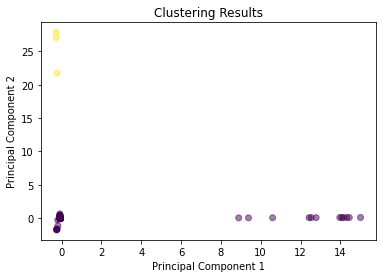

In [7]:
results = pd.DataFrame({'Document': range(len(corpus)), 'True Label': labels, 'Predicted Label': labels_pred})
print(results)

import matplotlib.pyplot as plt

plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=labels_pred, cmap='viridis', alpha=0.5)
plt.title('Clustering Results')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()